# **LIMPIEZA**

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv(r'C:\Heri\GitHub\.Semester\Discipulos-del-Caracol\data_sst_reto_coppel.csv')

In [3]:
# the first column is the index
data = data.set_index(data.columns[0])

In [4]:
data

,Fecha,Segmento,hora_llegada,hora_llamado,hora_salida,caja,tienda,status,estado
Unnamed: 0,,,,,,,,,
821243,2023-01-01,retail,0.503465,0.503477,0.503581,caja_a,Tienda_A,Atendido,Ciudad de México
821244,2023-01-01,retail,0.503581,0.503616,0.511174,caja_a,Tienda_A,Atendido,Ciudad de México
821245,2023-01-01,retail,0.503789,0.503801,0.505120,caja_b,Tienda_A,Atendido,Ciudad de México
821246,2023-01-01,retail,0.503847,0.505132,0.509333,caja_b,Tienda_A,Atendido,Ciudad de México
821247,2023-01-01,retail,0.503894,0.508072,0.509981,caja_c,Tienda_A,Atendido,Ciudad de México
...,...,...,...,...,...,...,...,...,...
18395866,2024-01-31,banco,0.905641,0.906602,0.907447,ventanilla_c,Tienda_B,Atendido,Quintana Roo
18395867,2024-01-31,banco,0.906521,0.907134,0.911394,ventanilla_a,Tienda_B,Atendido,Quintana Roo
18395868,2024-01-31,banco,0.907343,0.907481,0.913778,ventanilla_c,Tienda_B,Atendido,Quintana Roo


llegan y salen al otro dia

In [5]:
# update only the rows where 'hora_llegada' > 'hora_llamado'
mask = data['hora_llegada'] > data['hora_llamado']
data.loc[mask, 'hora_llamado'] += 1
data.loc[mask, 'hora_salida'] += 1

# update only the rows where 'hora_llegada' > 'hora_llamado'
data.loc[data['hora_llegada'] > data['hora_llamado'], 'hora_llamado'] += 1

In [6]:
# unique values of the third column
data[data.columns[1]].unique()

array(['retail', 'banco', 'afiliacion'], dtype=object)

In [7]:
data[data.columns[5]].unique()

array(['caja_a', 'caja_b', 'caja_c', 'caja_d', 'caja_e', 'caja_f',
       'caja_j', 'caja_h', 'caja_i', 'caja_k', 'ventanilla_a',
       'ventanilla_b', 'caja_l', 'ventanilla_c', 'ventanilla_d', 'caja_m',
       'p_a', 'ventanilla_e', 'ventanilla_f', 'caja_n', 'p_b', 'p_c',
       'caja_o', 'p_d', 'p_e', 'caja_p', 'caja_q', 'p_f', 'p_g', 'p_h',
       'p_i', 'p_j', 'p_k', 'p_l', 'p_m', 'p_n', 'ventanilla_g', 'p_o',
       'p_p', 'a_a', 'a_b', 'p_q', 'p_r', 'p_s', 'caja_r', 'caja_s',
       'caja_t', 'caja_u', 'caja_v', 'Caja_a', 'ventanilla_h', 'p_t',
       'Caja_b', 'p_u', 'ventanilla_i', 'Caja_c', 'Caja_d', 'Caja_e',
       'p_v', 'p_y', 'ventanilla_j', 'Caja_f', 'ventanilla_k',
       'ventanilla_l', 'ventanilla_m', 'ventanilla_n', 'ventanilla_o',
       'ventanilla_p', 'ventanilla_q', 'p_z', 'P_a', 'P_b',
       'ventanilla_r', 'ventanilla_s', 'P_c', 'caja_x', 'P_d'],
      dtype=object)

In [8]:
len(data[data.columns[5]].unique())

77

In [9]:
data[data.columns[6]].unique()

array(['Tienda_A', 'Tienda_B', 'Tienda_C', 'Tienda_D', 'Tienda_E',
       'Tienda_F', 'Tienda_G', 'Tienda_H', 'Tienda_I', 'Tienda_J',
       'Tienda_K', 'Tienda_L', 'Tienda_M', 'Tienda_N', 'Tienda_O',
       'Tienda_P', 'Tienda_Q', 'Tienda_R', 'Tienda_S', 'Tienda_T',
       'Tienda_U', 'Tienda_V', 'Tienda_X', 'Tienda_Y', 'Tienda_Z',
       'Tienda_AA', 'Tienda_AB', 'Tienda_AC', 'Tienda_AD', 'Tienda_AE',
       'Tienda_AF', 'Tienda_AG', 'Tienda_AH', 'Tienda_AI', 'Tienda_AJ',
       'Tienda_AK', 'Tienda_AL', 'Tienda_AM', 'Tienda_AN', 'Tienda_AO',
       'Tienda_AP', 'Tienda_AQ', 'Tienda_AX', 'Tienda_AY', 'Tienda_AZ',
       'Tienda_BA', 'Tienda_BB', 'Tienda_BC', 'Tienda_BD', 'Tienda_BE'],
      dtype=object)

In [10]:
len(data[data.columns[6]].unique())

50

In [11]:
data[data.columns[7]].unique()

array(['Atendido', 'Ausente'], dtype=object)

In [12]:
# create a new column with the difference between 'hora_llegada' and 'hora_salida'
data['duracion'] = data['hora_salida'] - data['hora_llegada']

In [13]:
data['espera'] = data['hora_llamado'] - data['hora_llegada']

In [14]:
data

,Fecha,Segmento,hora_llegada,hora_llamado,hora_salida,caja,tienda,status,estado,duracion,espera
Unnamed: 0,,,,,,,,,,,
821243,2023-01-01,retail,0.503465,0.503477,0.503581,caja_a,Tienda_A,Atendido,Ciudad de México,0.000116,0.000012
821244,2023-01-01,retail,0.503581,0.503616,0.511174,caja_a,Tienda_A,Atendido,Ciudad de México,0.007593,0.000035
821245,2023-01-01,retail,0.503789,0.503801,0.505120,caja_b,Tienda_A,Atendido,Ciudad de México,0.001331,0.000012
821246,2023-01-01,retail,0.503847,0.505132,0.509333,caja_b,Tienda_A,Atendido,Ciudad de México,0.005486,0.001285
821247,2023-01-01,retail,0.503894,0.508072,0.509981,caja_c,Tienda_A,Atendido,Ciudad de México,0.006088,0.004178
...,...,...,...,...,...,...,...,...,...,...,...
18395866,2024-01-31,banco,0.905641,0.906602,0.907447,ventanilla_c,Tienda_B,Atendido,Quintana Roo,0.001806,0.000961
18395867,2024-01-31,banco,0.906521,0.907134,0.911394,ventanilla_a,Tienda_B,Atendido,Quintana Roo,0.004873,0.000613
18395868,2024-01-31,banco,0.907343,0.907481,0.913778,ventanilla_c,Tienda_B,Atendido,Quintana Roo,0.006435,0.000139


In [15]:
# show the duracion == 0
data[data['duracion'] == 0] # ?

,Fecha,Segmento,hora_llegada,hora_llamado,hora_salida,caja,tienda,status,estado,duracion,espera
Unnamed: 0,,,,,,,,,,,
157109,2023-01-05,banco,0.656984,0.656984,0.656984,ventanilla_a,Tienda_V,Atendido,Querétaro,0.0,0.0
2948020,2023-03-06,banco,0.594206,0.594206,0.594206,ventanilla_a,Tienda_B,Atendido,Quintana Roo,0.0,0.0
3653100,2023-04-10,retail,0.437296,0.437296,0.437296,caja_j,Tienda_O,Atendido,Chihuahua,0.0,0.0
4548258,2023-04-19,banco,0.756104,0.756104,0.756104,caja_m,Tienda_AN,Atendido,Veracruz de Ignacio de la Llave,0.0,0.0
5212774,2023-05-14,banco,0.446104,0.446104,0.446104,caja_q,Tienda_AF,Atendido,Nuevo León,0.0,0.0
10157802,2023-08-09,banco,0.435479,0.435479,0.435479,ventanilla_d,Tienda_BE,Atendido,Guerrero,0.0,0.0
15820064,2023-11-22,banco,0.754738,0.754738,0.754738,ventanilla_c,Tienda_AX,Atendido,México,0.0,0.0


In [16]:
data = data.drop(data[data['duracion'] <= 0].index)
data = data.drop(data[data['espera'] <= 0].index)

# **PLOT**

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
# en las de la escuela no corran esto

# get only .01% of the data
data = data.sample(frac=0.0001) 

In [19]:
# change the column names
data.columns = ['Fecha', 'Segmento', 'Hora de Llegada', 'Hora de Llamado', 'Hora de Salida',
       'Caja', 'Tienda', 'Status', 'Estado', 'Duración', 'Espera']

In [20]:
# get a palette of colors of 3 colors
sns.color_palette('Set1')

[(0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 (0.596078431372549, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (1.0, 1.0, 0.2),
 (0.6509803921568628, 0.33725490196078434, 0.1568627450980392),
 (0.9686274509803922, 0.5058823529411764, 0.7490196078431373),
 (0.6, 0.6, 0.6)]

## **PAIRPLOT**

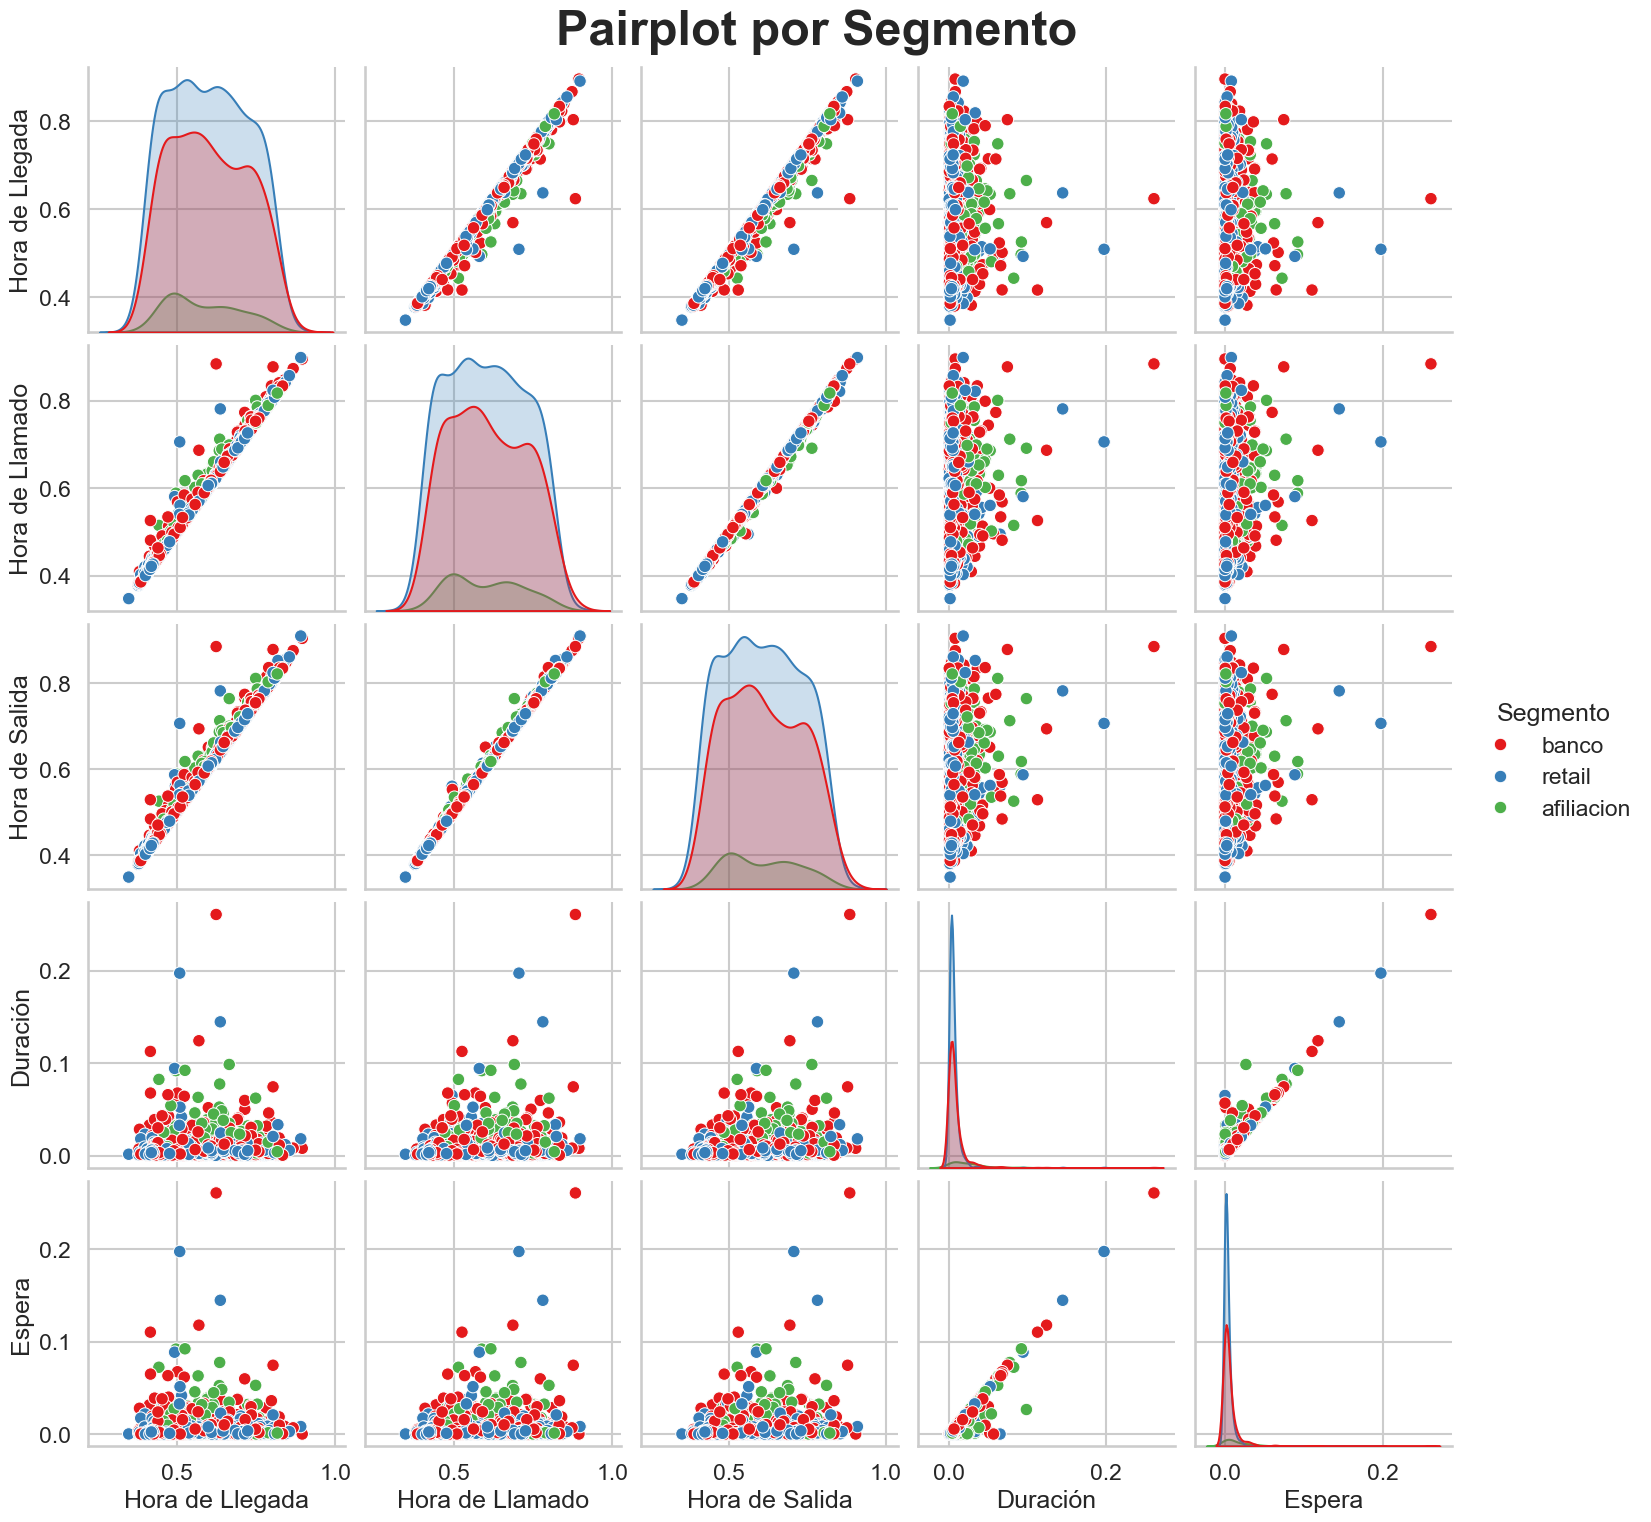

In [21]:
# Set a larger figure size and improve aesthetics
sns.set(style="whitegrid", context="talk")
g = sns.pairplot(
    data, 
    hue='Segmento', 
    diag_kind='kde', 
    palette='Set1',  # Use a softer color palette
    height=3,  # Adjust the size of each subplot
)

# add a title
g.fig.suptitle("Pairplot por Segmento", y=1.02, fontsize=35, fontweight='bold') 

# save the plot
plt.savefig('pairplot-segmento.svg', format='svg', bbox_inches='tight')
plt.show()

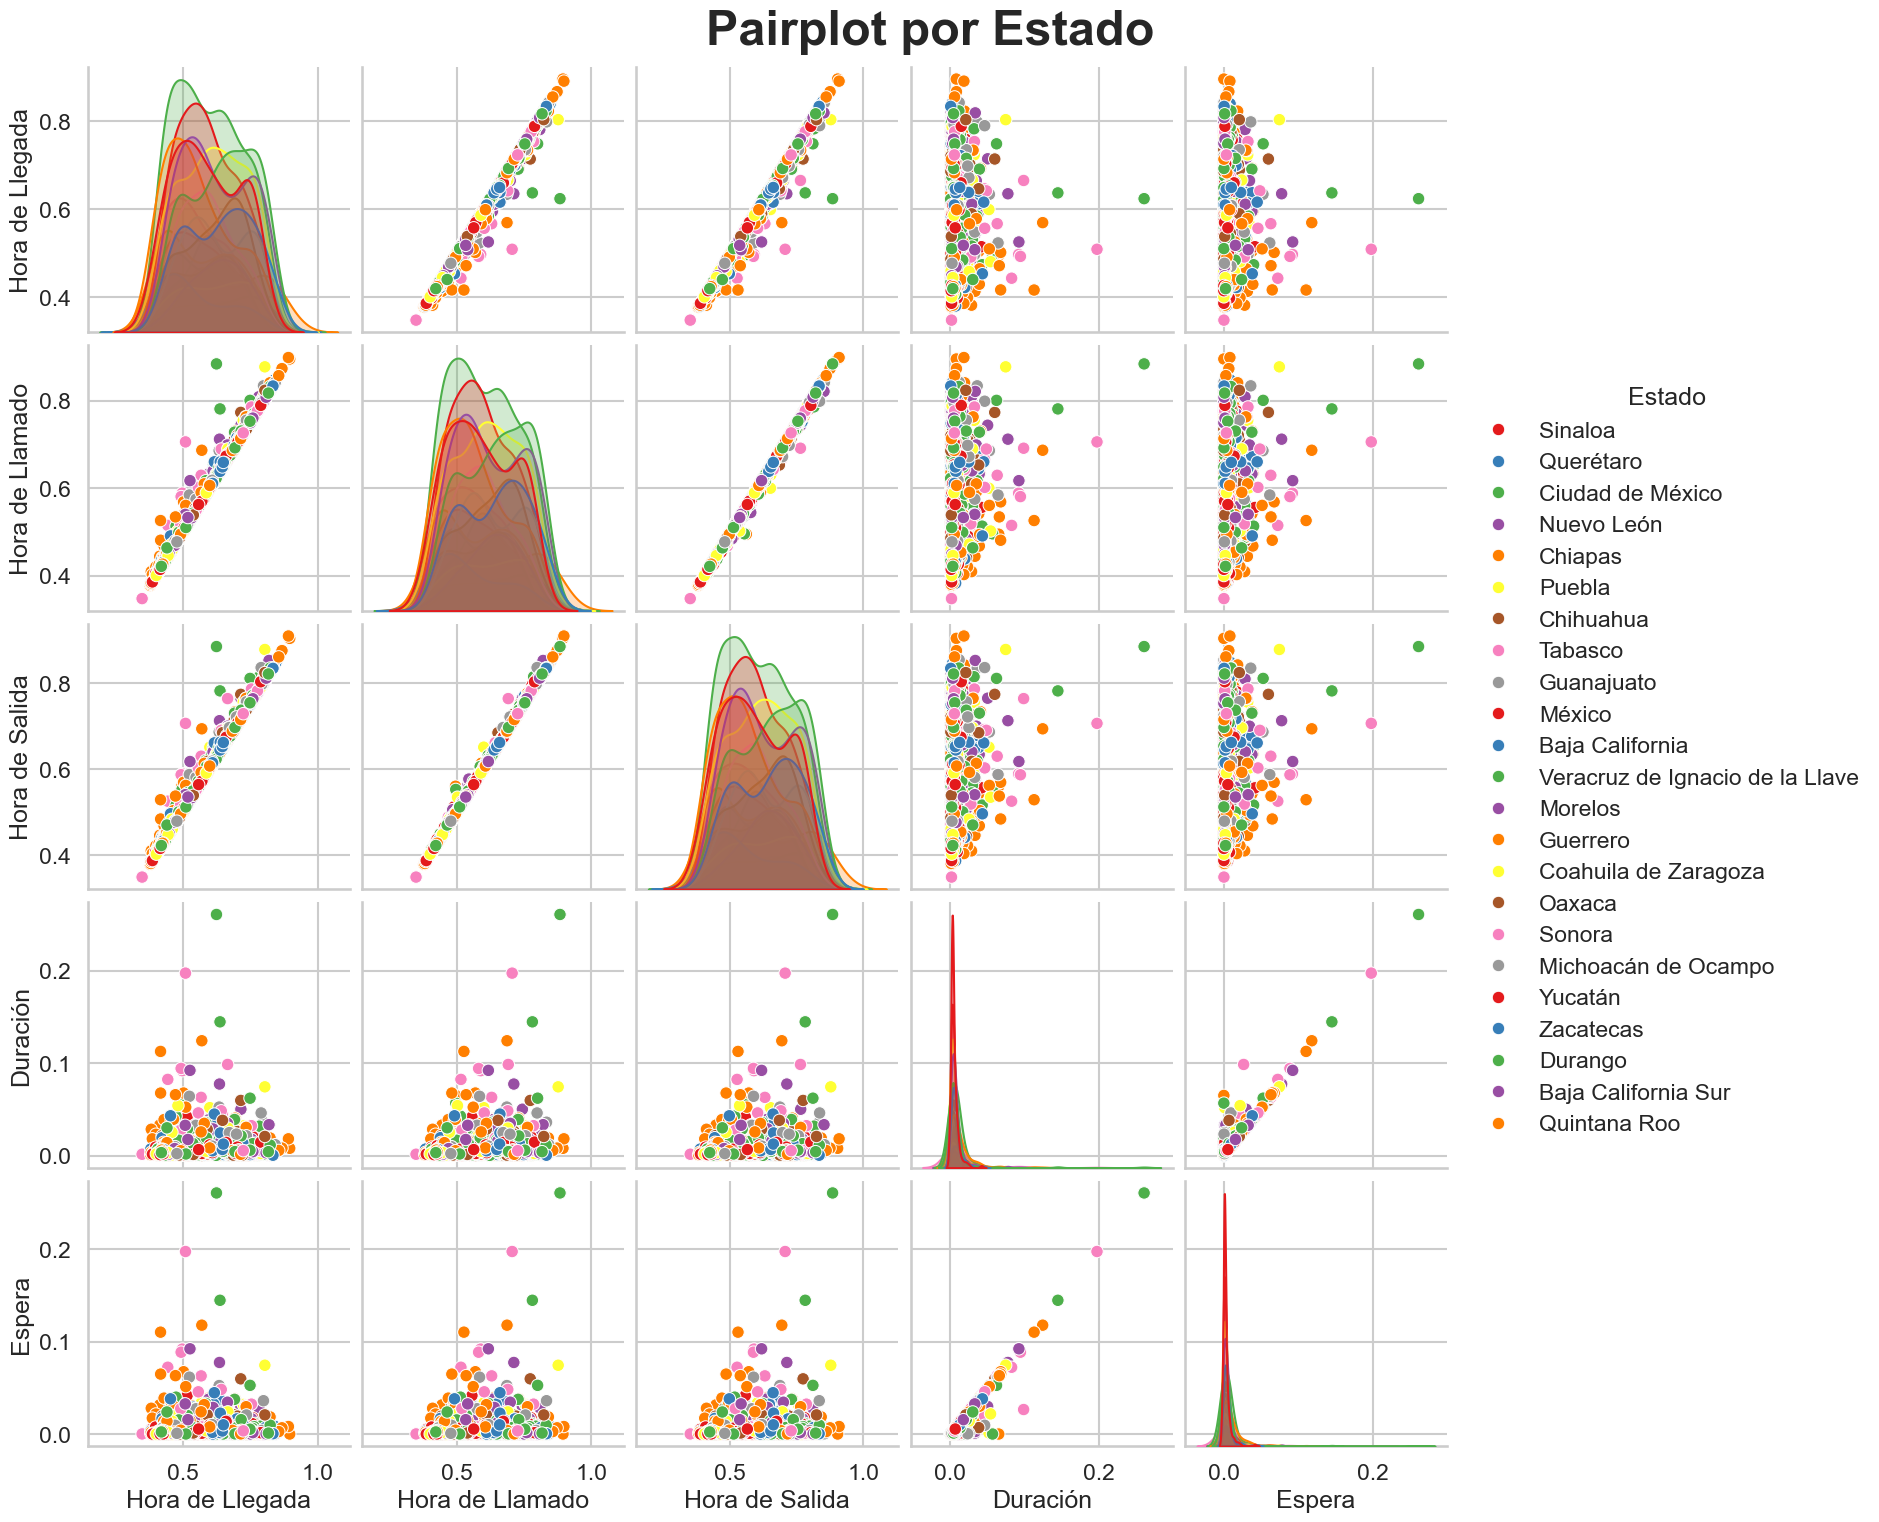

In [22]:
# Set a larger figure size and improve aesthetics
sns.set(style="whitegrid", context="talk")
g = sns.pairplot(
    data, 
    hue='Estado', 
    diag_kind='kde', 
    palette='Set1',  # Use a softer color palette
    height=3,  # Adjust the size of each subplot
)

# add a title
g.fig.suptitle("Pairplot por Estado", y=1.02, fontsize=35, fontweight='bold') 

# save the plot
plt.savefig('pairplot-estado.svg', format='svg', bbox_inches='tight')
plt.show()

In [23]:
# put the 'status' 'Ausente' first in the dataframe
data = data.sort_values(by='Status', ascending=False)

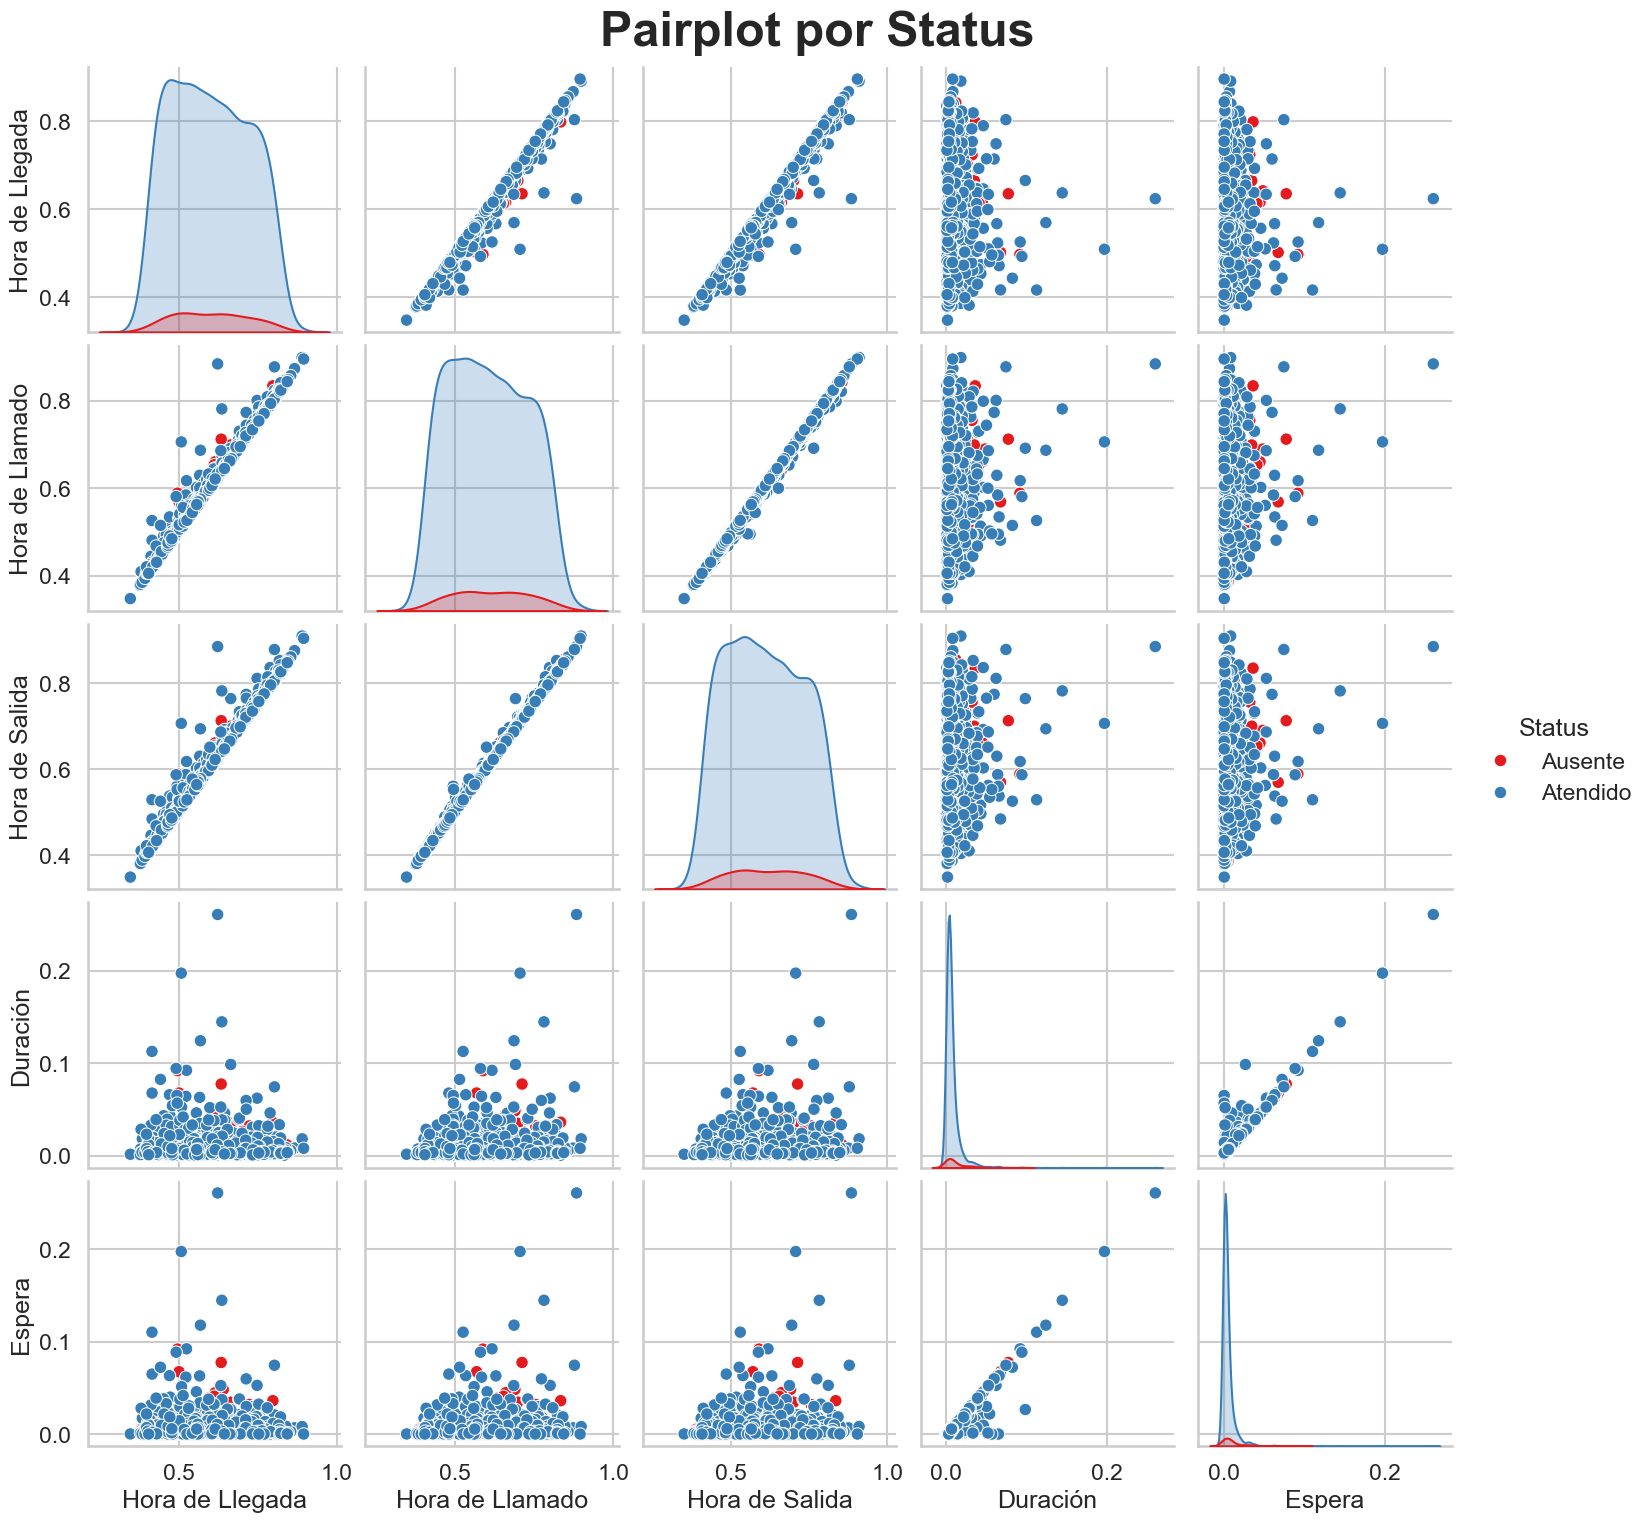

In [24]:
# Set a larger figure size and improve aesthetics
sns.set(style="whitegrid", context="talk")
g = sns.pairplot(
    data, 
    hue='Status', 
    diag_kind='kde', 
    palette='Set1',  # Use a softer color palette
    height=3,  # Adjust the size of each subplot
)

# add a title
g.fig.suptitle("Pairplot por Status", y=1.02, fontsize=35, fontweight='bold') 

# save the plot
plt.savefig('pairplot-status.svg', format='svg', bbox_inches='tight')
plt.show()

## **GRAFICOS DE VOLIN**

In [25]:
# make the 'Segmento' column Title Case
data['Segmento'] = data['Segmento'].str.title()

C:\Users\herie\AppData\Local\Temp\ipykernel_29284\508724162.py:2: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  ax = sns.violinplot(data=data, x='Segmento', y='Espera', hue='Status', split=True, palette='Set1', inner='quartile', linewidth=1.5, scale='count', saturation=1, width=0.8, dodge=True, cut=0, order=data.groupby('Segmento')['Espera'].mean().sort_values().index)


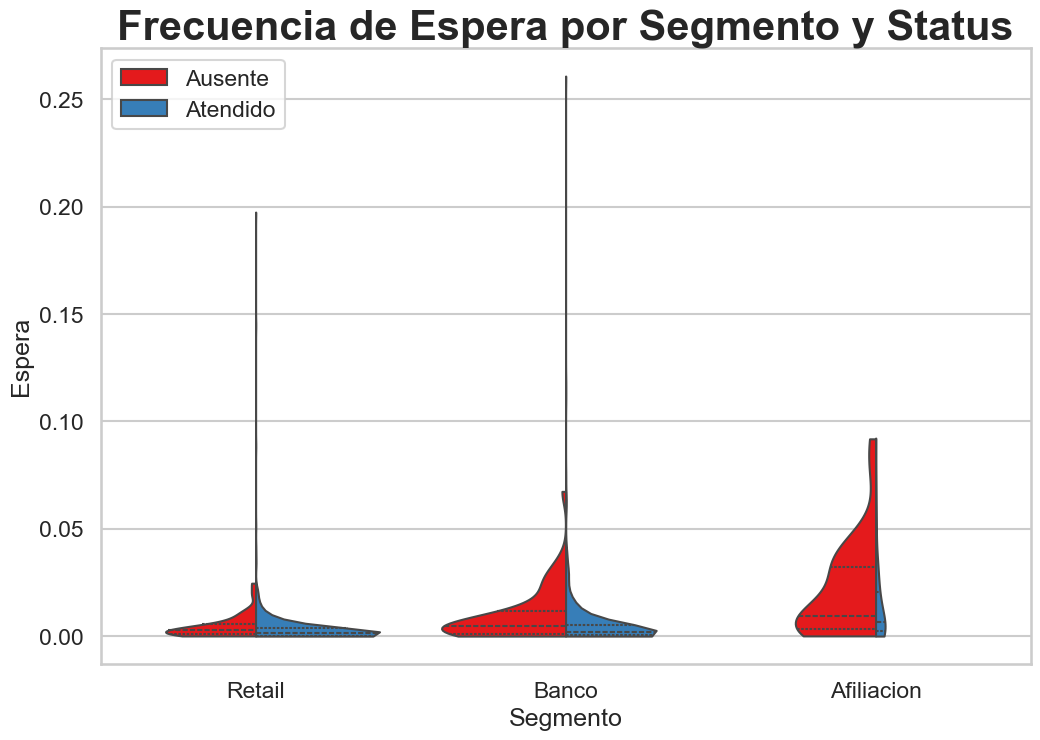

In [26]:
plt.figure(figsize=(12, 8))
ax = sns.violinplot(data=data, x='Segmento', y='Espera', hue='Status', split=True, palette='Set1', inner='quartile', linewidth=1.5, scale='count', saturation=1, width=0.8, dodge=True, cut=0, order=data.groupby('Segmento')['Espera'].mean().sort_values().index)
ax.legend(loc='upper left')
plt.title("Frecuencia de Espera por Segmento y Status", fontsize=30, fontweight='bold')
plt.savefig('violinplot-segmento-status-espera.svg', format='svg', bbox_inches='tight')
plt.show()

C:\Users\herie\AppData\Local\Temp\ipykernel_29284\4203967675.py:2: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  ax = sns.violinplot(data=data, x='Segmento', y='Duración', hue='Status', split=True, palette='Set1', inner='quartile', linewidth=1.5, scale='count', saturation=1, width=0.8, dodge=True, cut=0, order=data.groupby('Segmento')['Duración'].mean().sort_values().index)


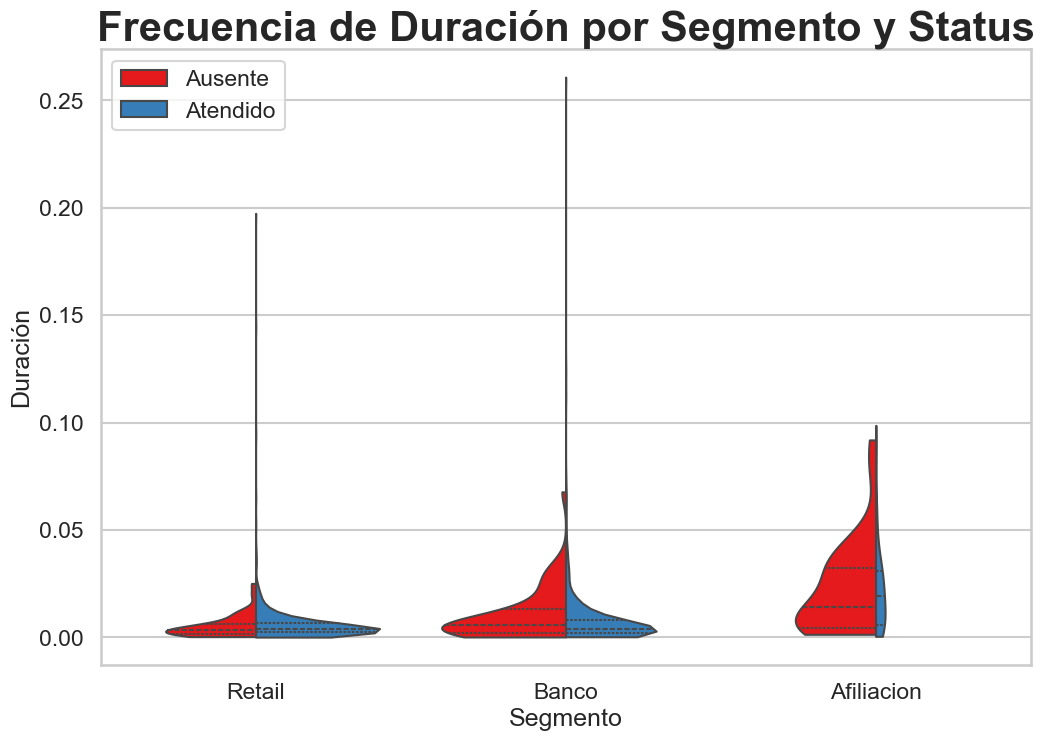

In [27]:
plt.figure(figsize=(12, 8))
ax = sns.violinplot(data=data, x='Segmento', y='Duración', hue='Status', split=True, palette='Set1', inner='quartile', linewidth=1.5, scale='count', saturation=1, width=0.8, dodge=True, cut=0, order=data.groupby('Segmento')['Duración'].mean().sort_values().index)
ax.legend(loc='upper left')
plt.title("Frecuencia de Duración por Segmento y Status", fontsize=30, fontweight='bold')
plt.savefig('violinplot-segmento-status-duracion.svg', format='svg', bbox_inches='tight')
plt.show()

### **Estado**

In [28]:
# Change the names of 'Estado' to the most common ones
data['Estado'] = data['Estado'].replace('Veracruz de Ignacio de la Llave', 'Veracruz')
data['Estado'] = data['Estado'].replace('Coahuila de Zaragoza', 'Coahuila')
data['Estado'] = data['Estado'].replace('Michoacán de Ocampo', 'Michoacán') 

C:\Users\herie\AppData\Local\Temp\ipykernel_29284\3769812027.py:2: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  ax = sns.violinplot(data=data, x='Estado', y='Espera', hue='Status', split=True, palette='Set1', inner='quartile', linewidth=1.5, scale='count', saturation=1, width=0.8, dodge=True, cut=0, order=data.groupby('Estado')['Espera'].mean().sort_values().index)
C:\Users\herie\AppData\Local\Temp\ipykernel_29284\3769812027.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=10)  # Rotate x-axis labels and set font size


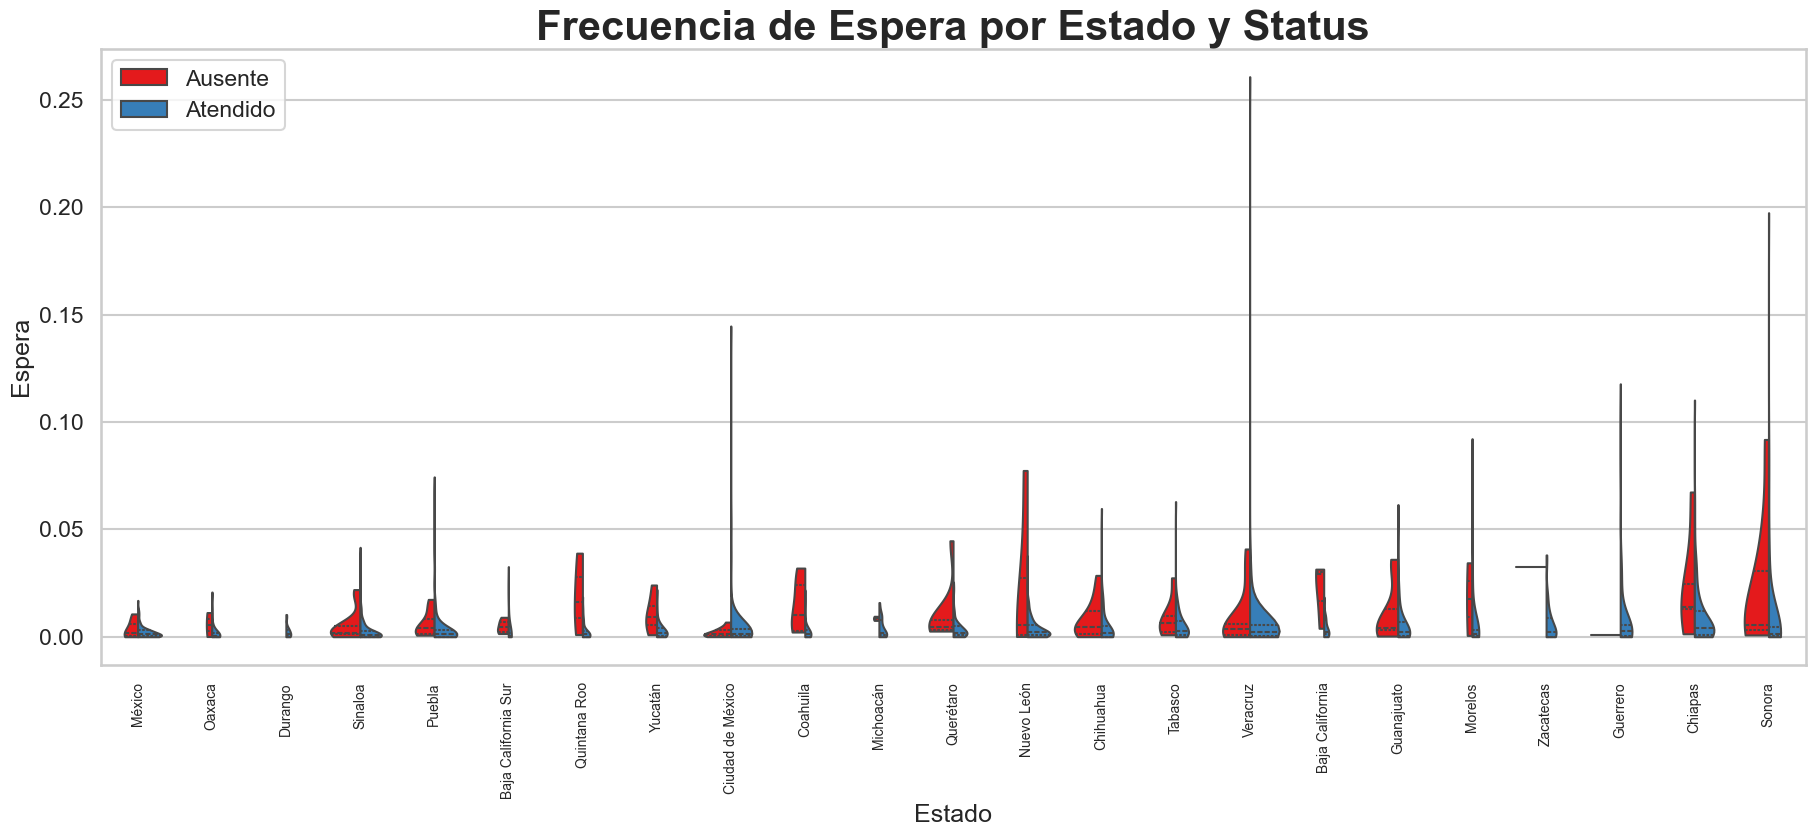

In [29]:
plt.figure(figsize=(22, 8))
ax = sns.violinplot(data=data, x='Estado', y='Espera', hue='Status', split=True, palette='Set1', inner='quartile', linewidth=1.5, scale='count', saturation=1, width=0.8, dodge=True, cut=0, order=data.groupby('Estado')['Espera'].mean().sort_values().index)
ax.legend(loc='upper left')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=10)  # Rotate x-axis labels and set font size
plt.title("Frecuencia de Espera por Estado y Status", fontsize=30, fontweight='bold')
plt.savefig('violinplot-estado-status-espera.svg', format='svg', bbox_inches='tight')
plt.show()

C:\Users\herie\AppData\Local\Temp\ipykernel_29284\3252640026.py:2: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  ax = sns.violinplot(data=data, x='Estado', y='Duración', hue='Status', split=True, palette='Set1', inner='quartile', linewidth=1.5, scale='count', saturation=1, width=0.8, dodge=True, cut=0, order=data.groupby('Estado')['Duración'].mean().sort_values().index)
C:\Users\herie\AppData\Local\Temp\ipykernel_29284\3252640026.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=10)  # Rotate x-axis labels and set font size


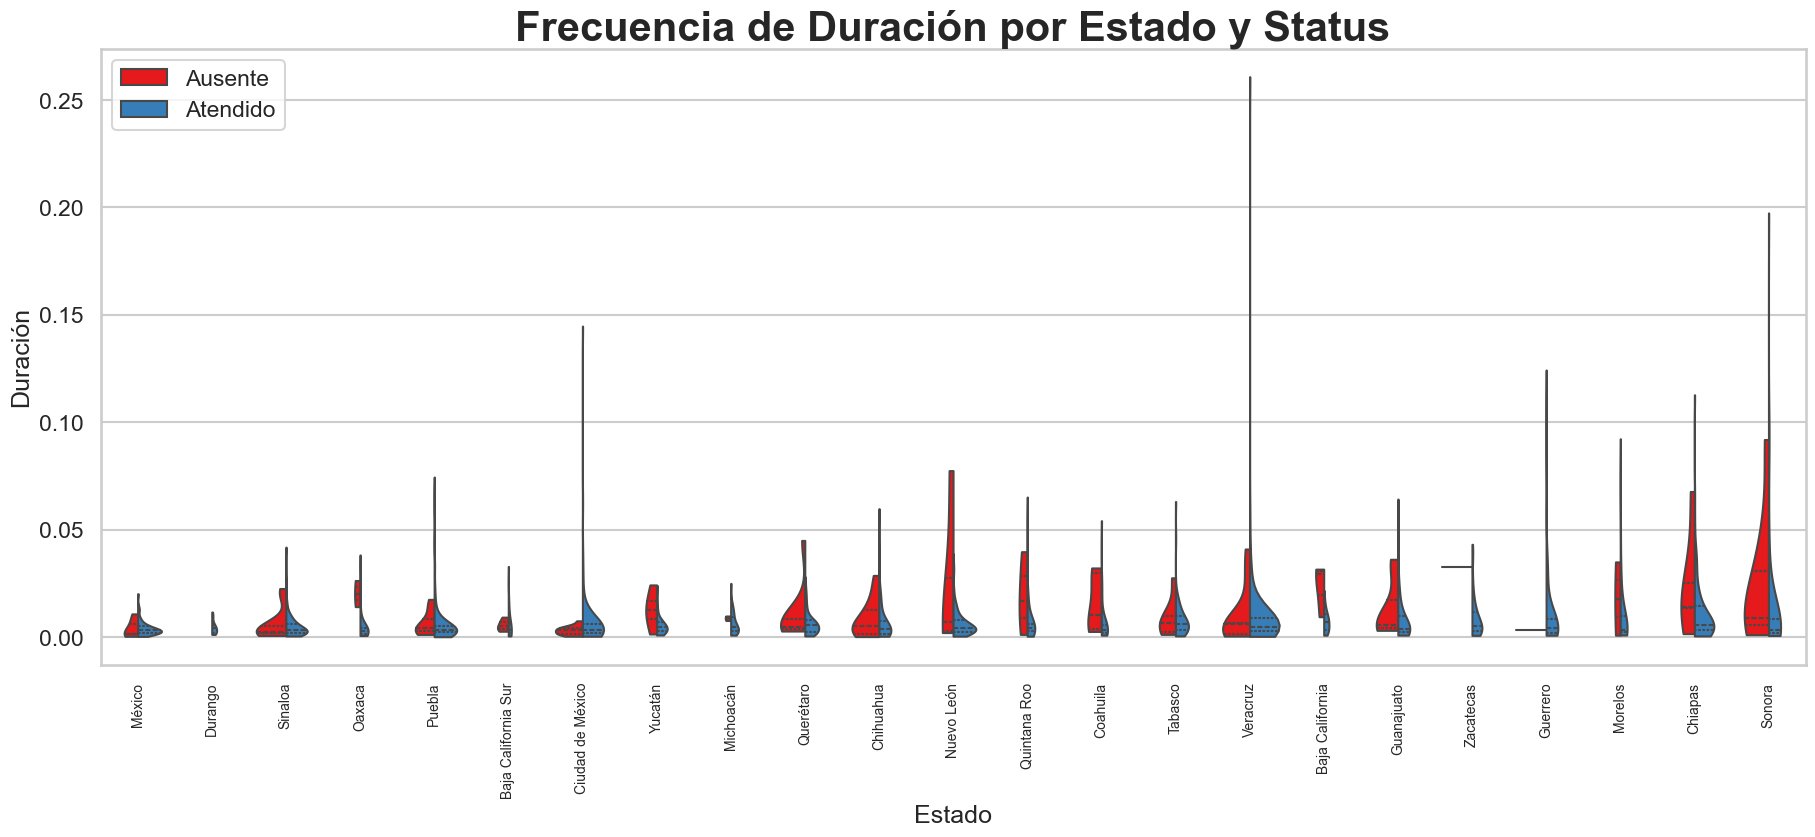

In [30]:
plt.figure(figsize=(22, 8))
ax = sns.violinplot(data=data, x='Estado', y='Duración', hue='Status', split=True, palette='Set1', inner='quartile', linewidth=1.5, scale='count', saturation=1, width=0.8, dodge=True, cut=0, order=data.groupby('Estado')['Duración'].mean().sort_values().index)
ax.legend(loc='upper left')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=10)  # Rotate x-axis labels and set font size
plt.title("Frecuencia de Duración por Estado y Status", fontsize=30, fontweight='bold')
plt.savefig('violinplot-estado-status-duracion.svg', format='svg', bbox_inches='tight')
plt.show()

### **Tienda**

In [31]:
# in 'Tienda' change the values from 'Tienda_A' to 'A', 'Tienda_B' to 'B', etc.
data['Tienda'] = data['Tienda'].str.replace('Tienda_', '')

C:\Users\herie\AppData\Local\Temp\ipykernel_29284\3788254079.py:2: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  ax = sns.violinplot(data=data, x='Tienda', y='Espera', hue='Status', split=True, palette='Set1', inner='quartile', linewidth=1.5, scale='count', saturation=1, width=0.8, dodge=True, cut=0, order=data.groupby('Tienda')['Duración'].mean().sort_values().index  )
C:\Users\herie\AppData\Local\Temp\ipykernel_29284\3788254079.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=10)  # Rotate x-axis labels and set font size


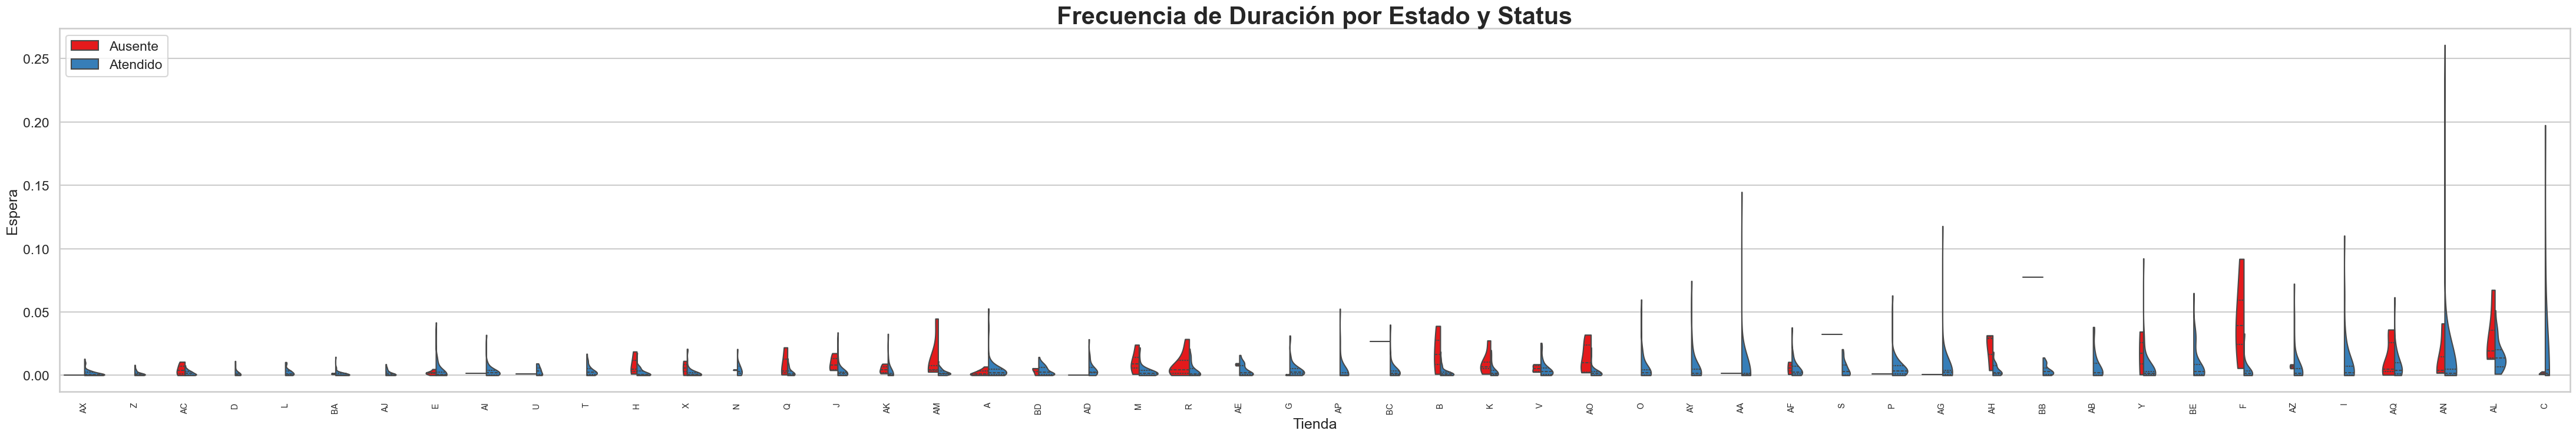

In [32]:
plt.figure(figsize=(55, 8))
ax = sns.violinplot(data=data, x='Tienda', y='Espera', hue='Status', split=True, palette='Set1', inner='quartile', linewidth=1.5, scale='count', saturation=1, width=0.8, dodge=True, cut=0, order=data.groupby('Tienda')['Duración'].mean().sort_values().index  )
ax.legend(loc='upper left')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=10)  # Rotate x-axis labels and set font size
plt.title("Frecuencia de Duración por Estado y Status", fontsize=30, fontweight='bold')
plt.savefig('violinplot-tienda-status-duracion.svg', format='svg', bbox_inches='tight')
plt.show()